In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt



In [21]:
df=pd.read_csv('HPE_Webinars.csv')
df.head()

,Category,Webinar_Title
0,Services,hpe greenlake for vdi
1,Networking,aruba ap-505 (rw) taa dual radio 2x2:2 802.11a...
2,Storage,hpe primera 600: upgrading a node pair
3,Storage,transforming hypervisors into deduplication ba...
4,Hybrid Cloud,b514 avoiding common mistakes in the cloud: be...


In [22]:
#Exploratory Data we want to know how the data is distributed for the Category attribute
df.groupby('Category').agg(['count'])

,Webinar_Title
,count
Category,
Compute,1721
Hybrid Cloud,719
Networking,1663
Services,289
Software,189
Solutions,327
Storage,1997


In [23]:
# we learned that this is an inbalnaced dataset, we will downsample the categories to match the lowest cattegory with random examples for each categories.
Compute=df[df['Category']=='Compute'].sample(189)
HC=df[df['Category']=='Hybrid Cloud'].sample(189)
Networking=df[df['Category']=='Networking'].sample(189)
Services=df[df['Category']=='Services'].sample(189)
Software=df[df['Category']=='Software'].sample(189)
Solutions=df[df['Category']=='Solutions'].sample(189)
Storage=df[df['Category']=='Storage'].sample(189)

webinar_balanced=pd.concat([Compute,HC,Networking,Services,Software,Solutions,Storage], ignore_index=True)


In [24]:
#lets look at the new balanced Data Frame:
print(webinar_balanced.shape)
webinar_balanced.groupby('Category').agg(['count'])

(1323, 2)


,Webinar_Title
,count
Category,
Compute,189
Hybrid Cloud,189
Networking,189
Services,189
Software,189
Solutions,189
Storage,189


In [25]:
#lets Begin with Text Vectorization
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(webinar_balanced.Webinar_Title).toarray()
labels = webinar_balanced.Category
features.shape

(1323, 582)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(webinar_balanced['Webinar_Title'], webinar_balanced['Category'], random_state = 0)
count_vect = CountVectorizer()



C:\Users\larav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\larav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\larav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\larav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\l

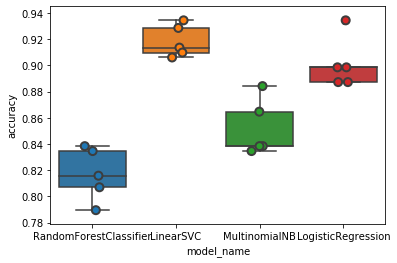

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [28]:
cv_df.groupby('model_name').accuracy.mean()



model_name
LinearSVC                 0.918452
LogisticRegression        0.901158
MultinomialNB             0.852022
RandomForestClassifier    0.817029
Name: accuracy, dtype: float64

X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)


print(clf.predict(count_vect.transform(["hpe proliant dl360 gen10 4208 2.1ghz 8-core 1p 16gb-r s100i nc 4lff 500w ps server"])))